# **Student Performance Indicator**

### **Life cycle of Machine learnig project**

* Understanding the problem Statement
* Data Collection
* Data Checks to Perform
* Exploratory data Analysis
* Data Pre-Processing
* Model Training
* Choose best Model

## 1) Problem Statement

* This project understand how the student's performance in math, reading, and writing based on demographic and contextual factors such as gender, ethnicity, parental education, lunch type, and test preparation. The goal is to identify patterns and relationships influencing academic achievement.


## 2) Data Collection

* Dataset source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/code
*  The dataset consists of 8 column and 1000 rows

## 3) Data Description

* gender: The gender of the student (e.g., male, female).
* race_ethnicity: The group classification of the student (e.g., group A, group B, etc.).
* parental_level_of_education: The highest level of education attained by the student's parent(s) (e.g., bachelor's degree, some college).
* lunch: The type of lunch the student receives (e.g., standard, free/reduced).
* test_preparation_course: Whether the student completed a test preparation course (e.g., none, completed).
* math_score: The student's score in mathematics.
* reading_score: The student's score in reading.
* writing_score: The student's score in writing.







### 3.1) Import Data and Required Packages

#### Importing Pandas,Numpy,Matplotlib,Seaborn and Warnings Library

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas Dataframe

In [42]:
df=pd.read_csv('data/stud.csv')

#### Show Top 5 records

In [43]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the data

In [44]:
df.shape

(1000, 8)

## 4.Data Checks to perform

* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

### 4.1 Check Missing Values

In [45]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

##### There are no missing values in the dataset

### 4.2 Check Duplicates

In [46]:
df.duplicated().sum()

0

##### There are no duplicates values in the dataset

### 4.3 Check data types

In [47]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 4.4 Checking the number of unique values of each column

In [48]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 4.5 Check statistics of data set

In [49]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight

* Consistent Performance: The average scores for math, reading, and writing are relatively close, suggesting a balanced curriculum or consistent evaluation criteria.
  
* High Standard Deviation: The standard deviations for all three subjects indicate some variability in performance.

* Outliers: Scores like 0 in math and 10 in writing might require investigation to check if they are outliers or represent missing/incomplete data

### 4.6 Exploring Data

In [50]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print ('We  have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features),categorical_features))

We  have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [51]:
# viewing the unique values in categorical columns
print("Categories in 'gender' variable: ",end=" ")
print(df['gender'].unique())
print("- -"*30)

print("\nCategories in 'race_ethnicity' variable: ",end=" ")
print(df['race_ethnicity'].unique())
print("- -"*30)

print("\nCategories in 'parental_level_of_education' variable: ",end=" ")
print(df['parental_level_of_education'].unique())
print("- -"*30)

print("\nCategories in 'lunch' variable: ",end=" ")
print(df['lunch'].unique())
print("- -"*30)

print("\nCategories in 'test_preparation_course' variable: ",end=" ")
print(df['test_preparation_course'].unique())
print("- -"*30)


Categories in 'gender' variable:  ['female' 'male']
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

Categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

Categories in 'lunch' variable:  ['standard' 'free/reduced']
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

Categories in 'test_preparation_course' variable:  ['none' 'completed']
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -


### 4.7 Adding columns for "Total Score" and "Average"

In [52]:
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average_score'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### Analysing how many number of students got full mark in respective field

In [53]:
math_full = df[df['math_score'] == 100]['average_score'].count()
writing_full = df[df['writing_score'] == 100]['average_score'].count()
reading_full = df[df['reading_score'] == 100]['average_score'].count()


print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


#### Analysing how many number of students got full mark in respective field

In [54]:
math_less_20 = df[df['math_score'] <= 20]['average_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average_score'].count()
reading_less_20 = df[df['reading_score'] <= 20]['average_score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#### Insights

* From above values we get students have performed the worst in Maths
* Best performance is in reading section

### 5.Data Visualization

## 5.1 Visualize average score distribution to make some conclusion
* Histogram
* Kernel Distribution Function(KDE)

### 5.1.1 Distribution of average and total scores by gender

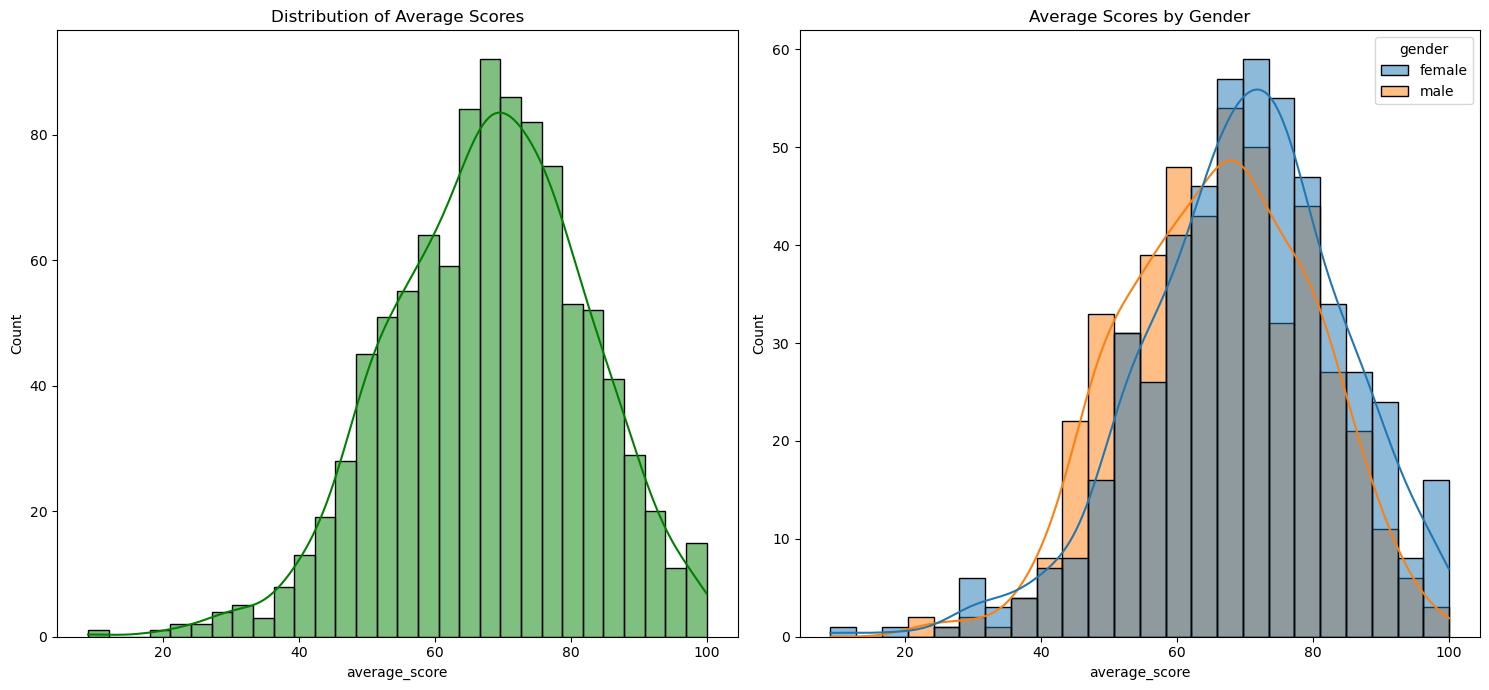

In [55]:

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First subplot
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Distribution of Average Scores')

# Second subplot
sns.histplot(data=df, x='average_score', kde=True, hue='gender', ax=axs[1])
axs[1].set_title('Average Scores by Gender')

# Display the plots
plt.tight_layout()
plt.show()

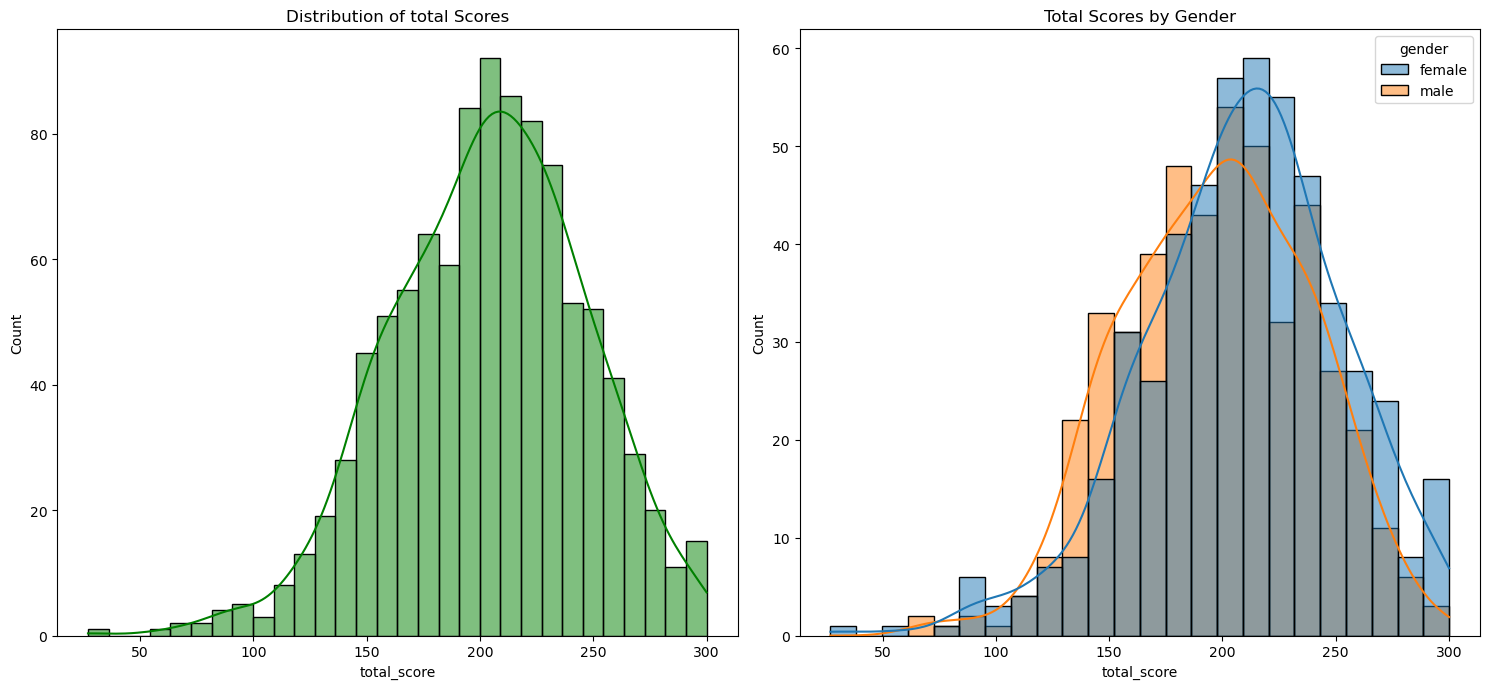

In [56]:
fig, axs = plt.subplots(1,2, figsize=(15,7))

# First subplot
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Distribution of total Scores')

# Second subplot
sns.histplot(data=df, x='total_score', kde=True, hue='gender', ax=axs[1])
axs[1].set_title('Total Scores by Gender')

# Display the plots
plt.tight_layout()
plt.show()


### Insight
* Female students tend to perform well than male students

### 5.1.2 Distribution of average scores by lunch

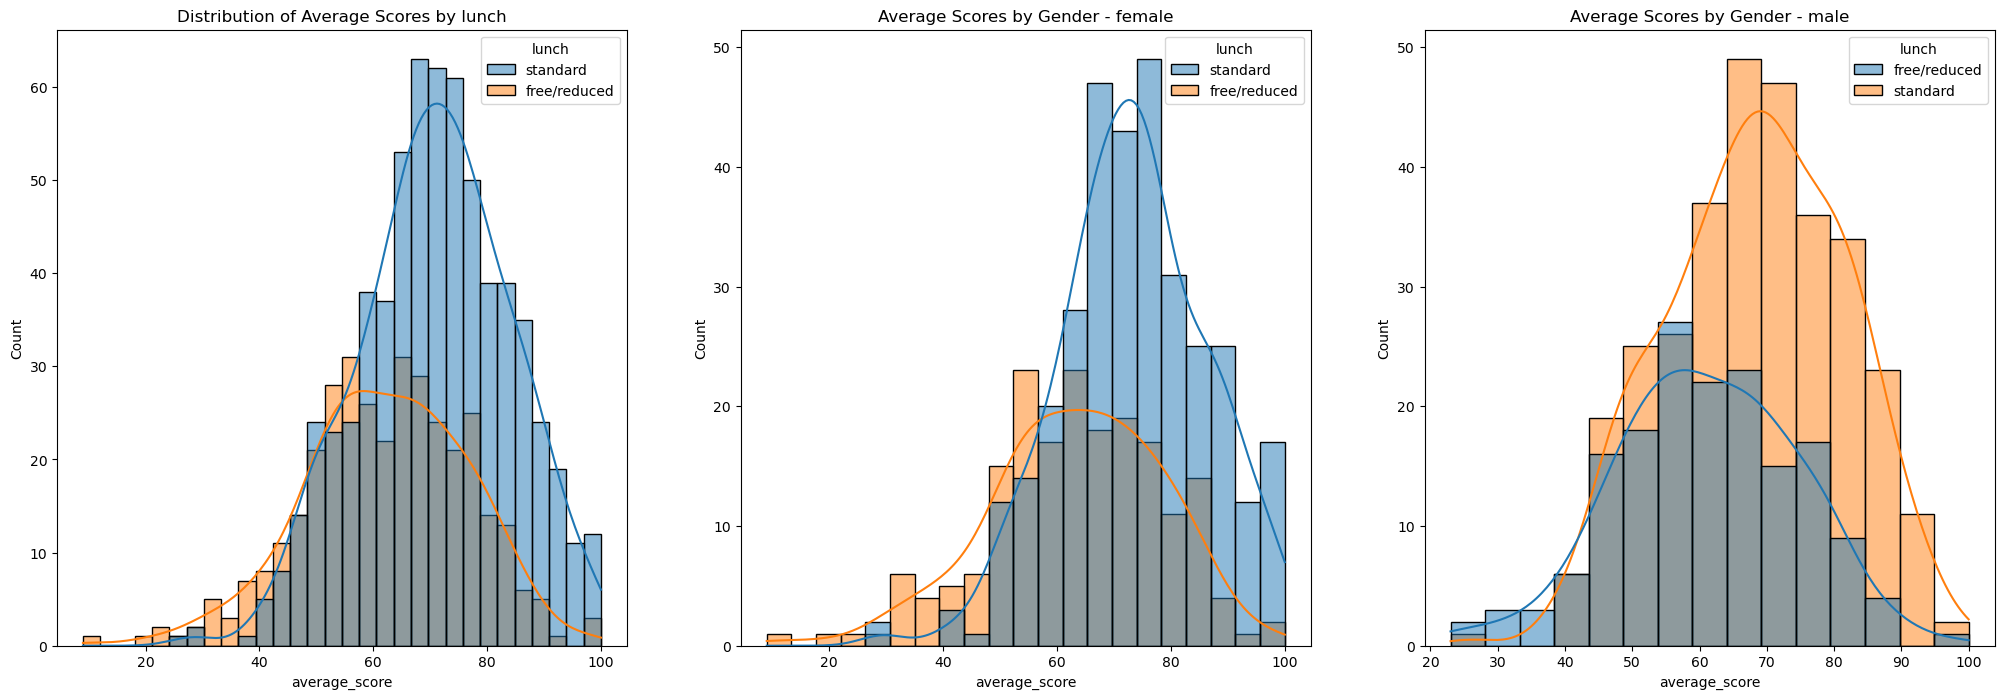

In [57]:
fig, axs = plt.subplots(1, 3, figsize=(25, 8))

# First subplot
sns.histplot(data=df, x='average_score', bins=30, kde=True, hue='lunch', ax=axs[0])
axs[0].set_title('Distribution of Average Scores by lunch')

# Second subplot
sns.histplot(data=df[df.gender == 'female'], x='average_score', kde=True, hue='lunch', ax=axs[1])
axs[1].set_title('Average Scores by Gender - female')

# Third subplot
sns.histplot(data=df[df.gender == 'male'], x='average_score', kde=True, hue='lunch', ax=axs[2])
axs[2].set_title('Average Scores by Gender - male')

# Display the plots

plt.show()

### Insights
* Standard lunch helps perform well in exams.* 
Standard lunch helps perform well in exams be it a male or a female.

### 5.1.3 Distribution of average scores by parental_level_of_education

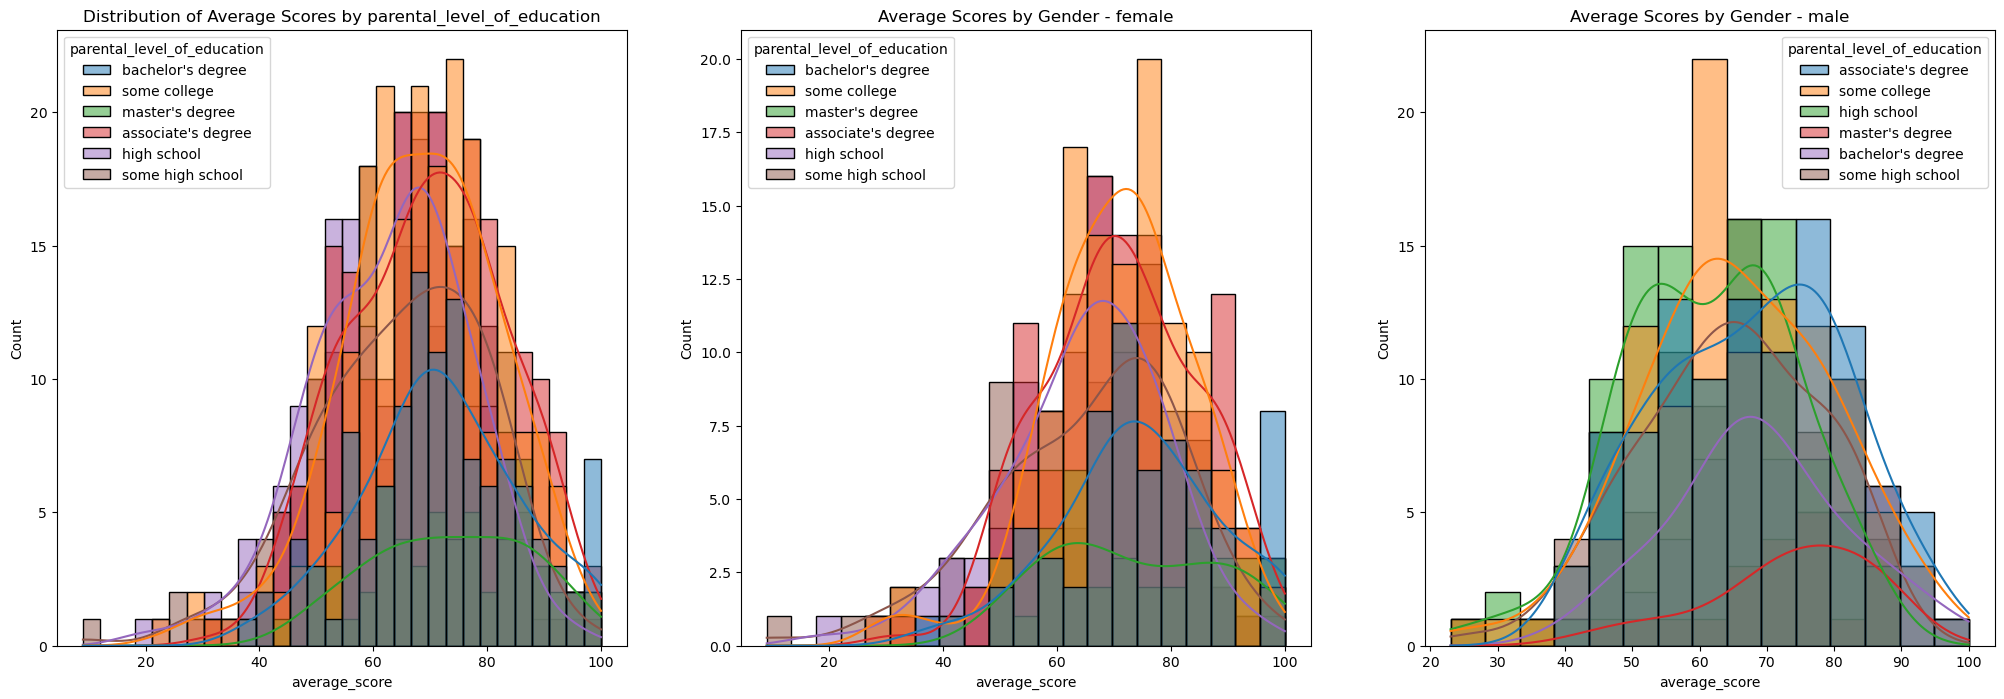

In [58]:
fig, axs = plt.subplots(1, 3, figsize=(25, 8))

# First subplot
sns.histplot(data=df, x='average_score', bins=30, kde=True, hue='parental_level_of_education', ax=axs[0])
axs[0].set_title('Distribution of Average Scores by parental_level_of_education')

# Second subplot
sns.histplot(data=df[df.gender == 'female'], x='average_score', kde=True, hue='parental_level_of_education', ax=axs[1])
axs[1].set_title('Average Scores by Gender - female')

# Third subplot
sns.histplot(data=df[df.gender == 'male'], x='average_score', kde=True, hue='parental_level_of_education', ax=axs[2])
axs[2].set_title('Average Scores by Gender - male')

# Display the plots

plt.show()

### Insights
* Students with parents who have higher education levels (e.g., bachelor's or master's degrees) may perform better on average due to:
   * Greater academic support.
   * Better access to educational resources.
  
* A stronger emphasis on education at home.
Students whose parents have lower education levels (e.g., high school or below) might score lower on average due to:
   * Limited resources.
   * Less academic reinforcement at home.
* 3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

### 5.1.4 Distribution of average scores by race/ethnicity

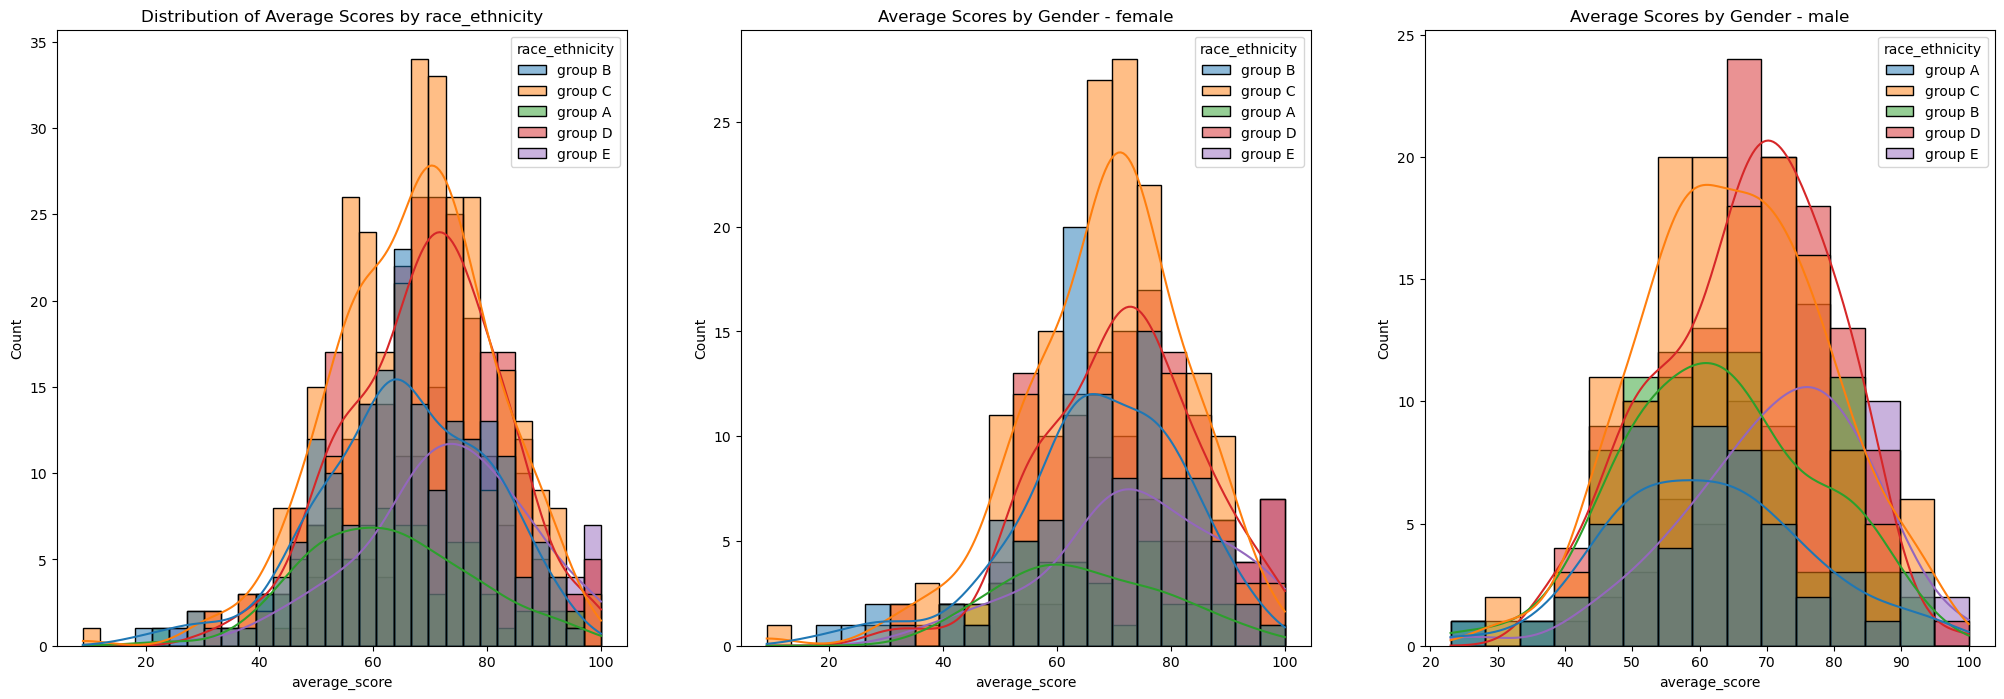

In [59]:
fig, axs = plt.subplots(1, 3, figsize=(25, 8))

# First subplot
sns.histplot(data=df, x='average_score', bins=30, kde=True, hue='race_ethnicity', ax=axs[0])
axs[0].set_title('Distribution of Average Scores by race_ethnicity')

# Second subplot
sns.histplot(data=df[df.gender == 'female'], x='average_score', kde=True, hue='race_ethnicity', ax=axs[1])
axs[1].set_title('Average Scores by Gender - female')

# Third subplot
sns.histplot(data=df[df.gender == 'male'], x='average_score', kde=True, hue='race_ethnicity', ax=axs[2])
axs[2].set_title('Average Scores by Gender - male')

# Display the plots

plt.show()

### Insights
* Students of group A  and group B tends to perform poorly in exam.* 
Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

## 5.2 Maximumum score of students in all three subjects

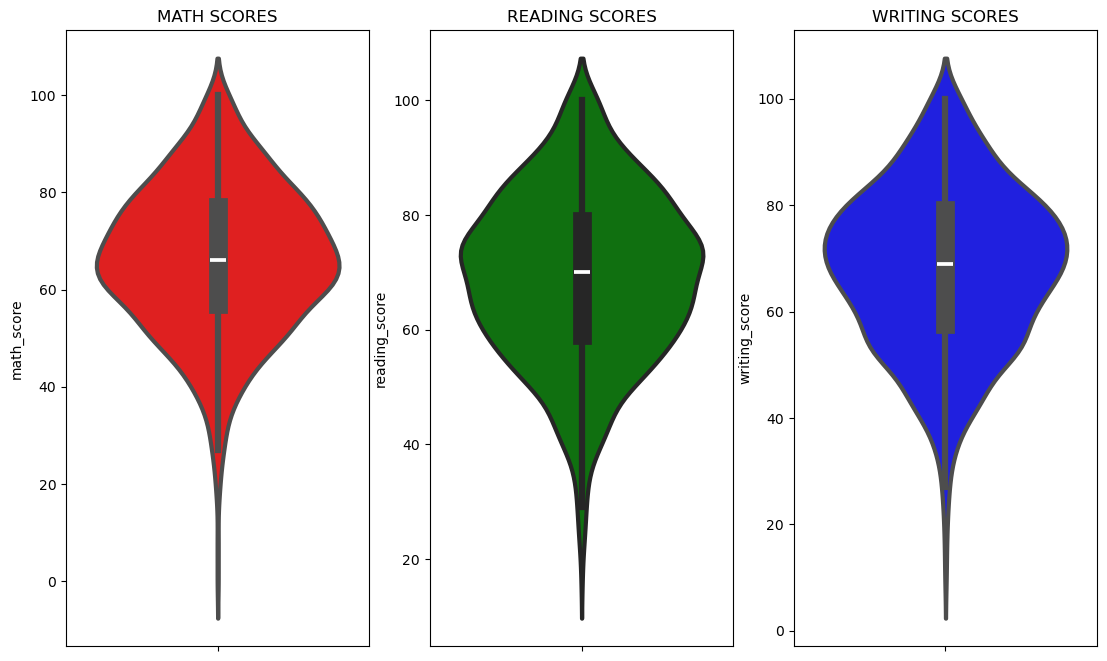

In [60]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

### Insights
* From the above three plots its clearly visible that most of the students score in between 60-80 in reading and writing  whereas in Maths most of them score from 50-80

In [61]:
size = df['gender'].value_counts()


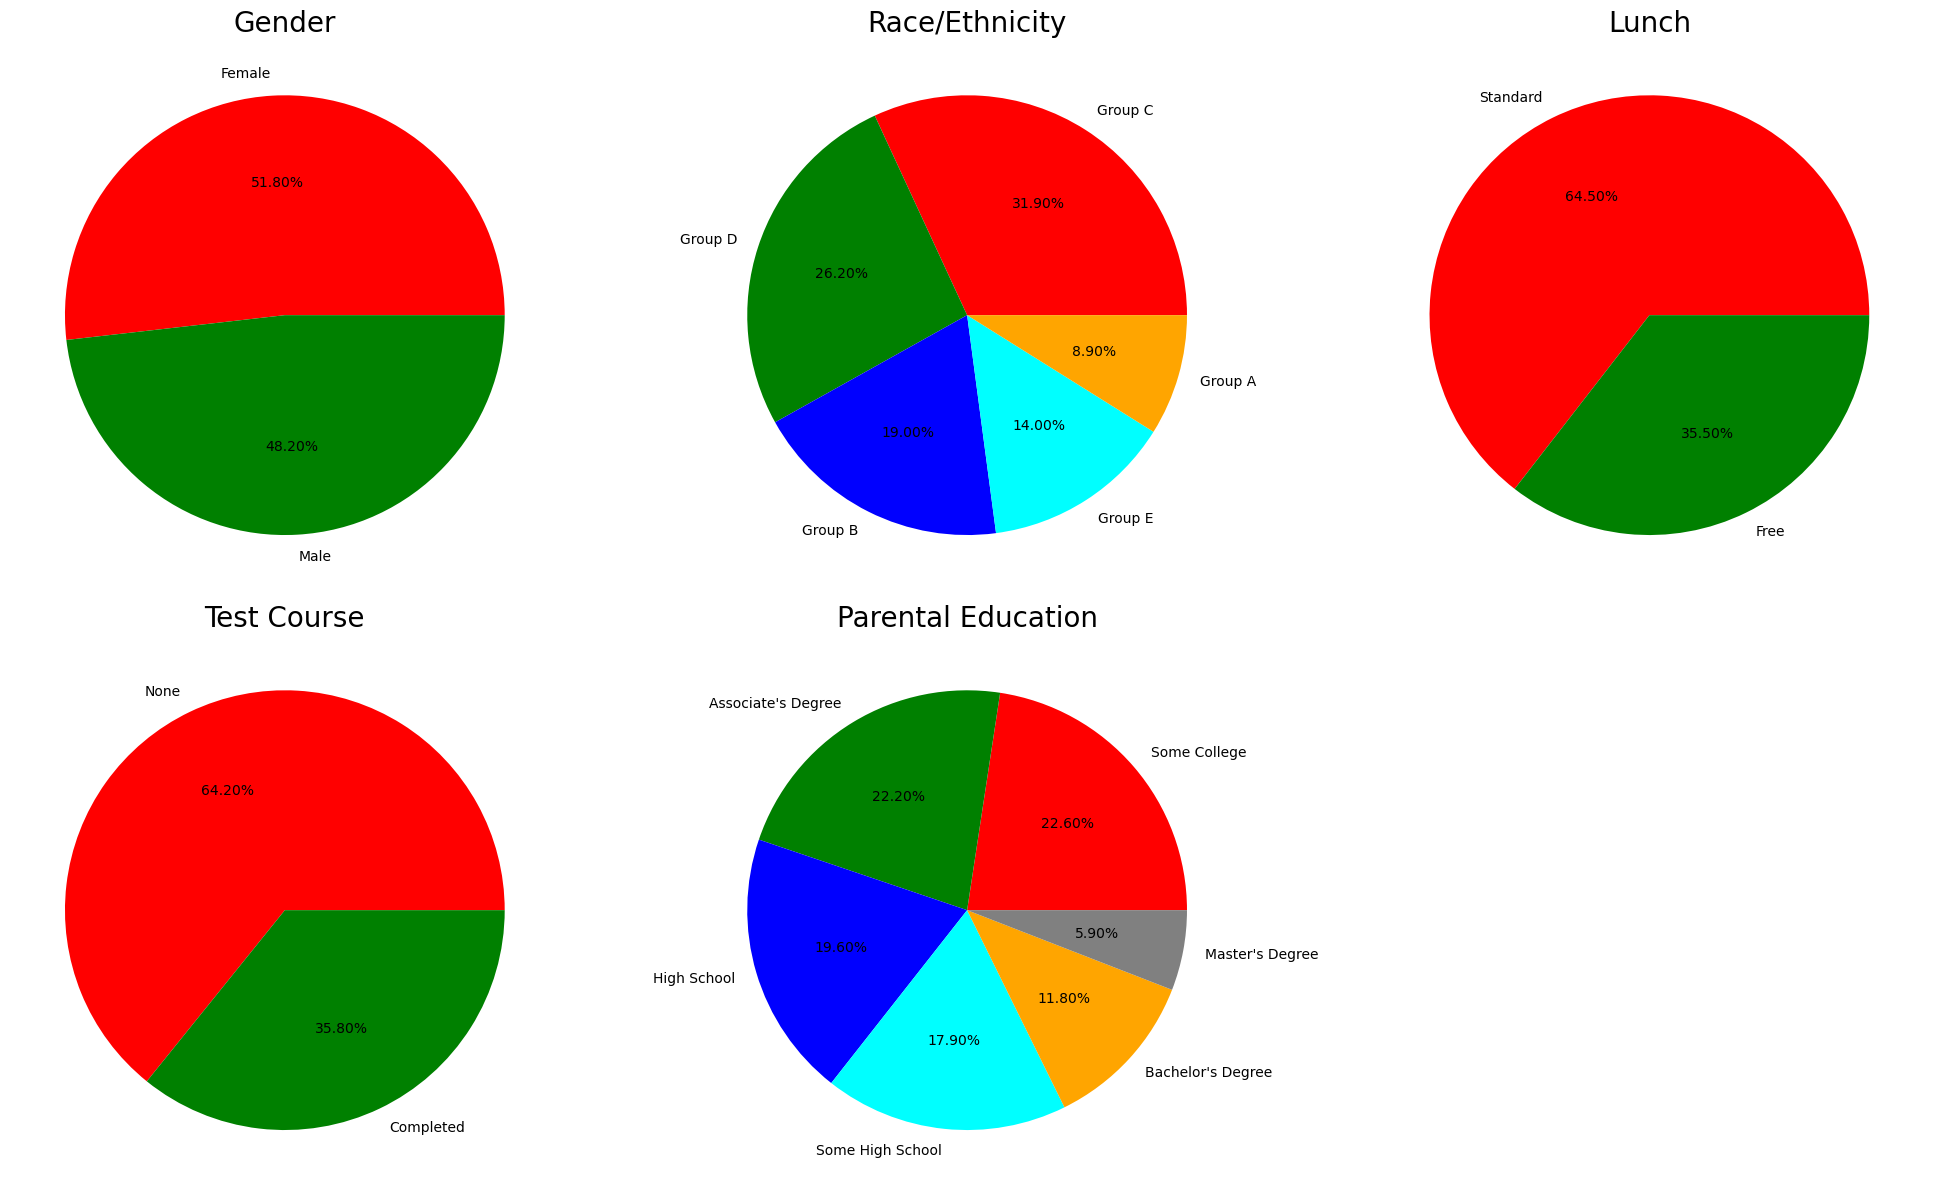

In [62]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 18)

# First row (1st to 3rd pie charts)
plt.subplot(3, 3, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(3, 3, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(3, 3, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

# Second row (4th and 5th pie charts)
plt.subplot(3, 3, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(3, 3, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

# Empty spots in 3rd row (6th, 7th, 8th positions)
# We don't need to plot anything here, so we'll leave them empty.

# Adjust layout to prevent overlap
plt.tight_layout()
plt.grid()

# Display the pie charts
plt.show()


### Insights
* Number of Male and Female students is almost equal
* Number students are greatest in Group C
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree

### 6) Feature Wise Visualization

### 6.1 GENDER COLUMN
* How is distribution of Gender ?
* Is gender has any impact on student's performance ?

### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

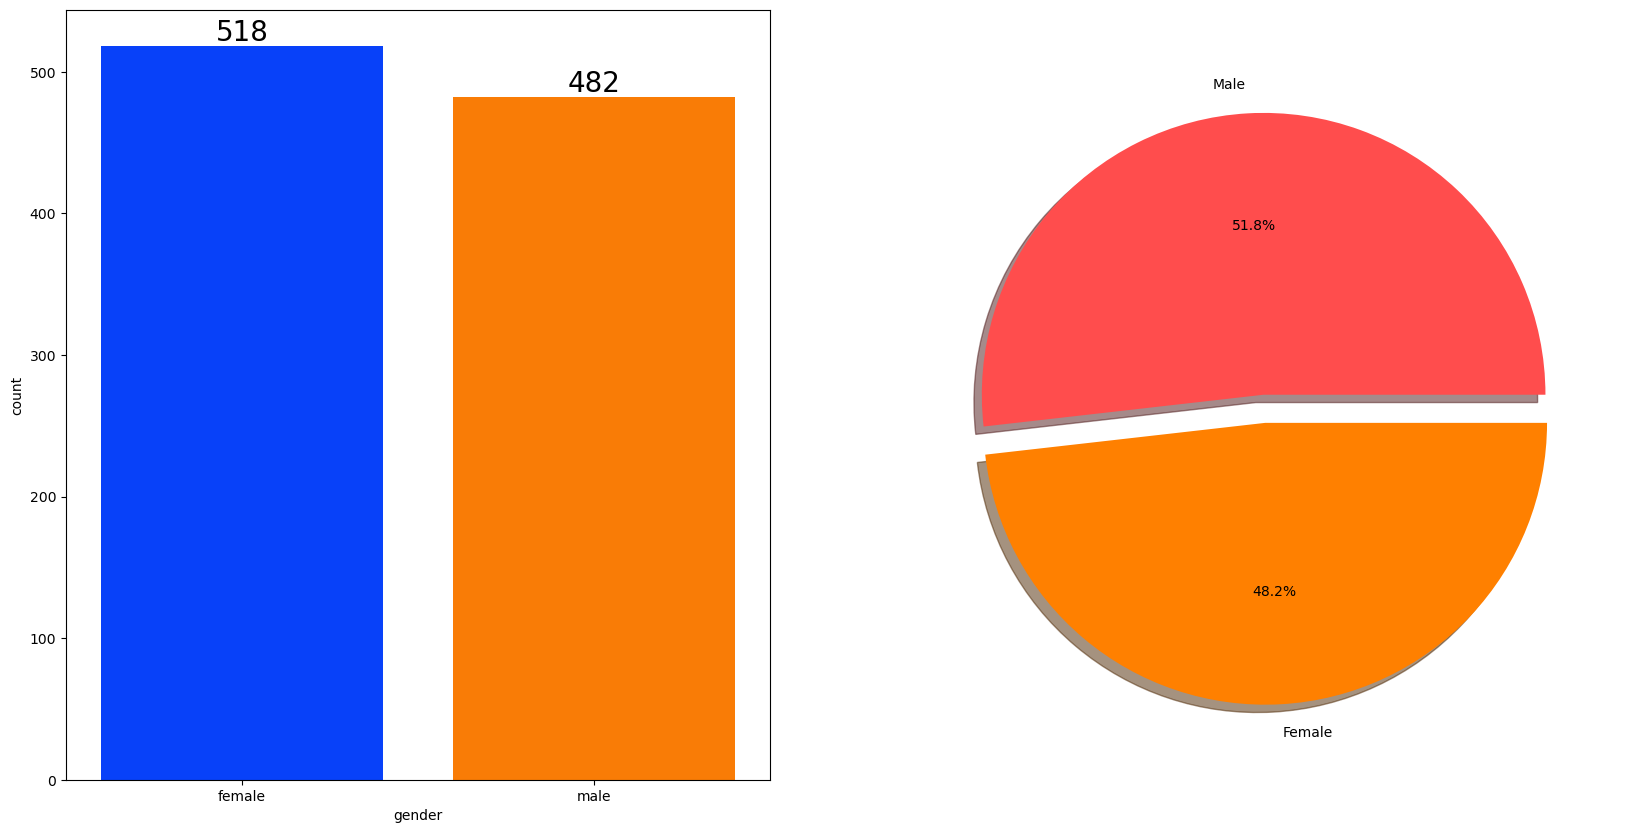

In [63]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Count Plot on the left
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Pie Chart on the right
plt.subplot(1, 2, 2)  # Specifies the position of the pie chart (right side)
plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d', '#ff8000'])

# Show the plot
plt.show()

### Insights
* Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [68]:
numeric_cols = df.select_dtypes(include=['number'])
gender_group = df.groupby('gender')[numeric_cols.columns].mean()
gender_group

     math_score  reading_score  writing_score  total_score  average_score
0            72             72             74          218      72.666667
1            69             90             88          247      82.333333
2            90             95             93          278      92.666667
3            47             57             44          148      49.333333
4            76             78             75          229      76.333333
..          ...            ...            ...          ...            ...
995          88             99             95          282      94.000000
996          62             55             55          172      57.333333
997          59             71             65          195      65.000000
998          68             78             77          223      74.333333
999          77             86             86          249      83.000000

[1000 rows x 5 columns]


,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


[0 1]


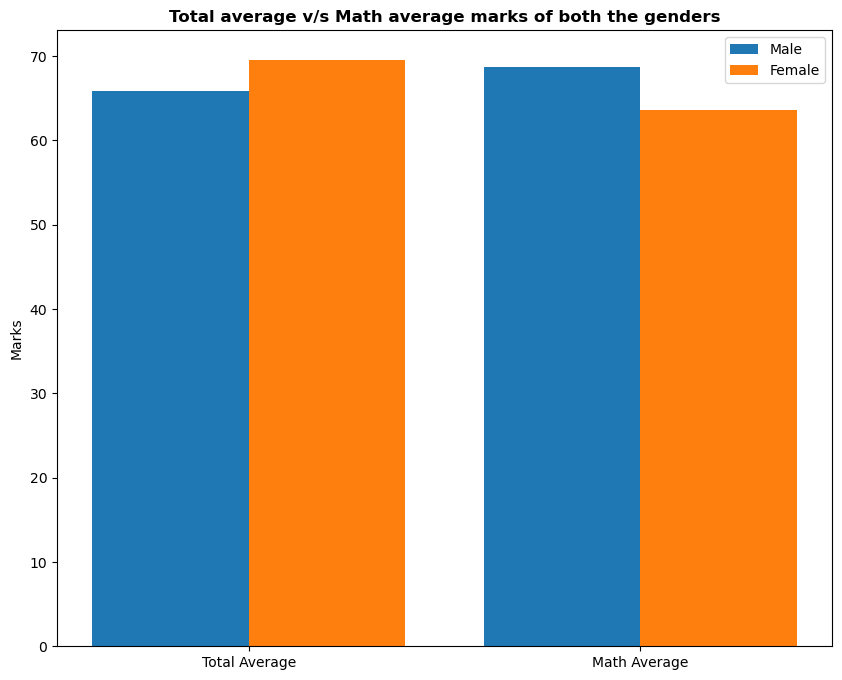

In [69]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']

female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

### Insights
* On an average females have a better overall score than men.
* whereas males have scored higher in Maths.

### 6.2 RACE/EHNICITY COLUMN
* How is Group wise distribution ?
* Is Race/Ehnicity has any impact on student's performance ?

### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

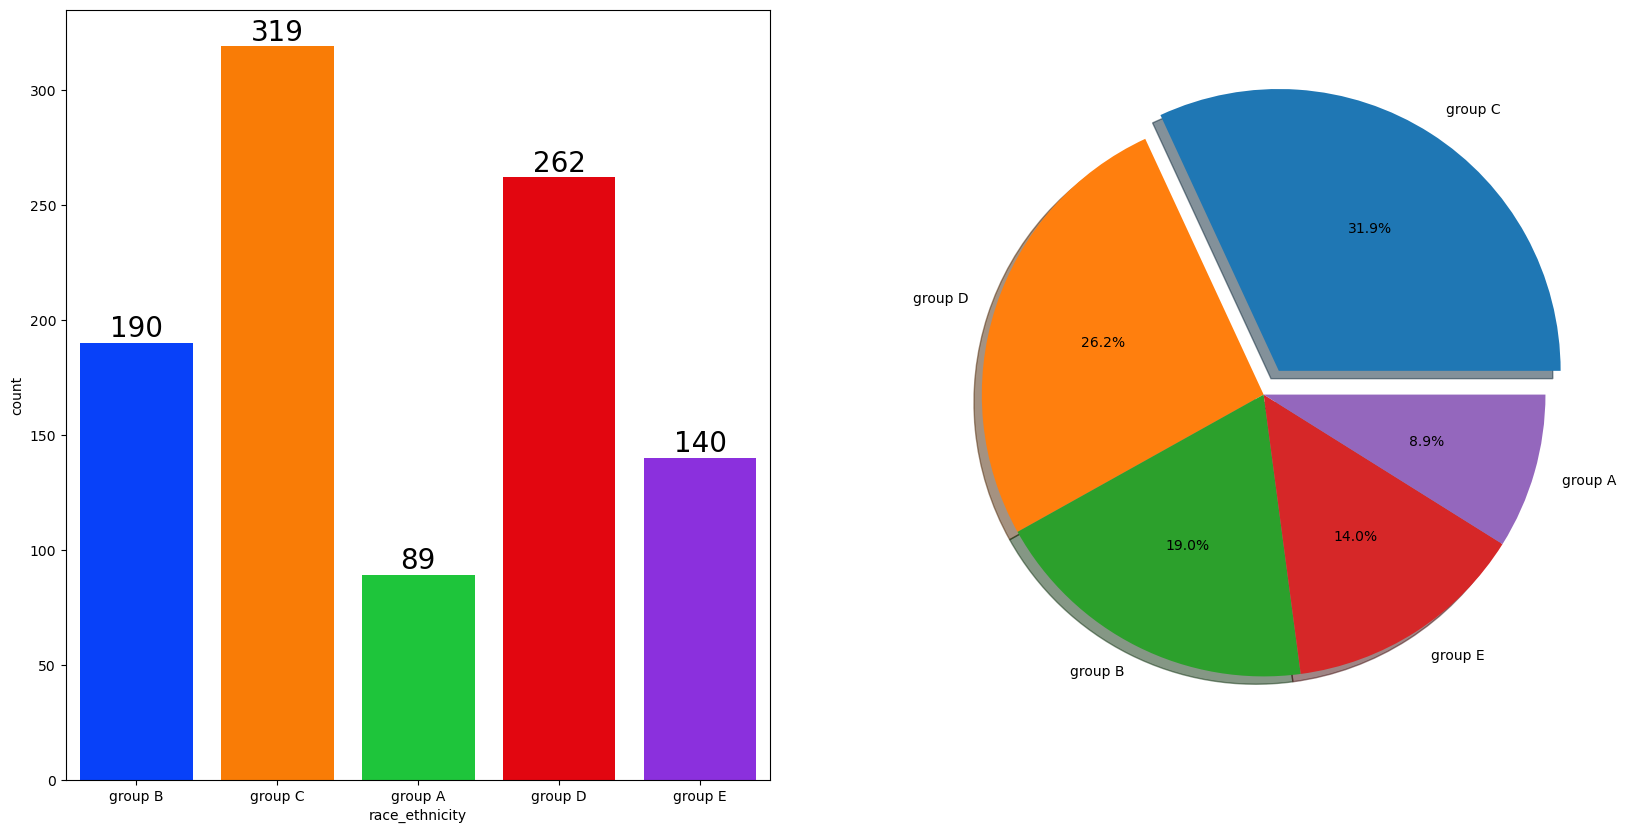

In [72]:
f,ax=plt.subplots(1,2,figsize=(20,10))

# Count Plot on the left
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright' , ax=ax[0] , saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

# Pie Chart on the right
plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()



### Insights
* Most of the student belonging from group C /group D.
* Lowest number of students belong to groupA.

### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

In [75]:
Group_data2=df.groupby('race_ethnicity')
Group_data2

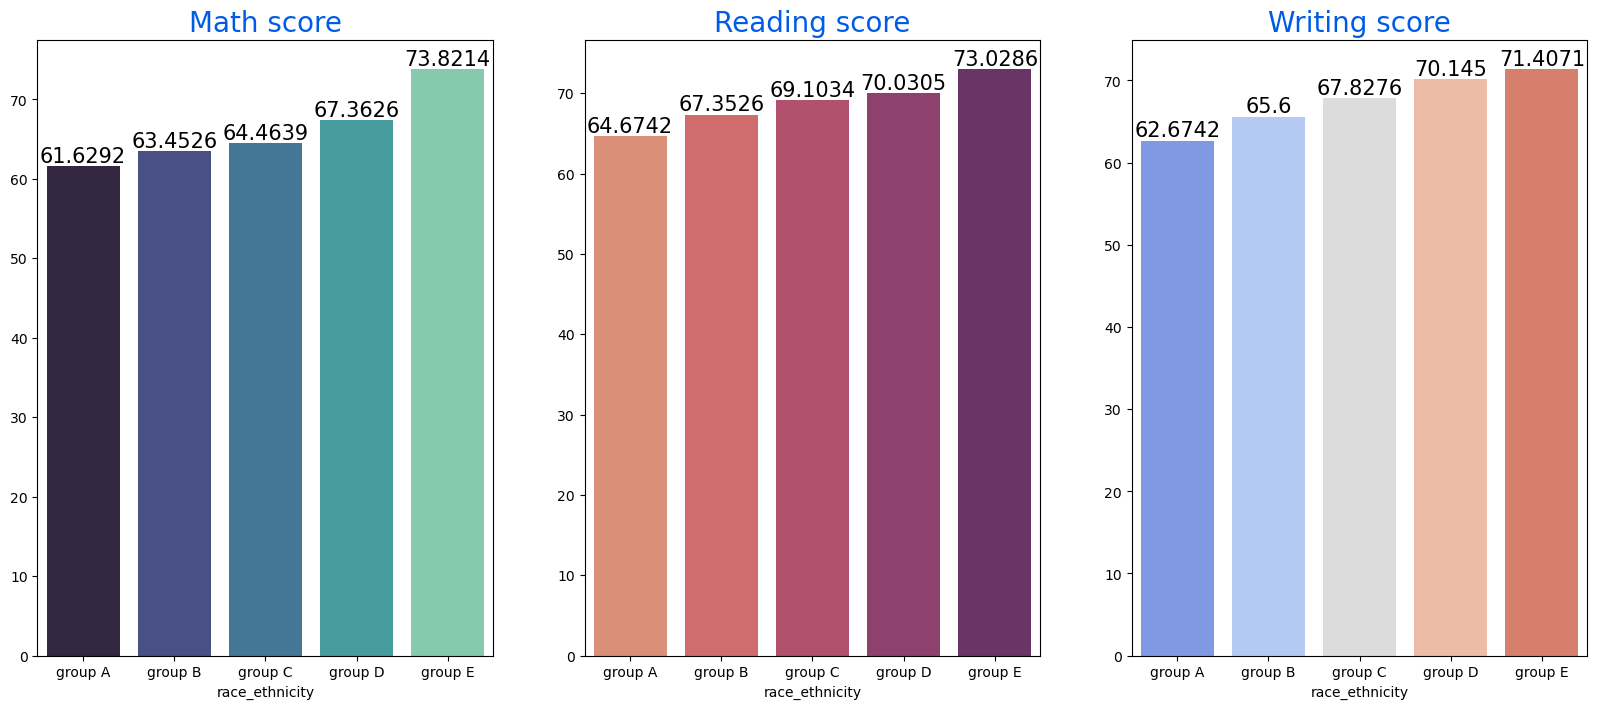

In [76]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

### Insights
* Students of group A and group B tends to perform poorly in exam.
* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

### 6.3 PARENTAL LEVEL OF EDUCATION COLUMN

* What is educational background of student's parent ?
* Is parental education has any impact on student's performance ?

### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

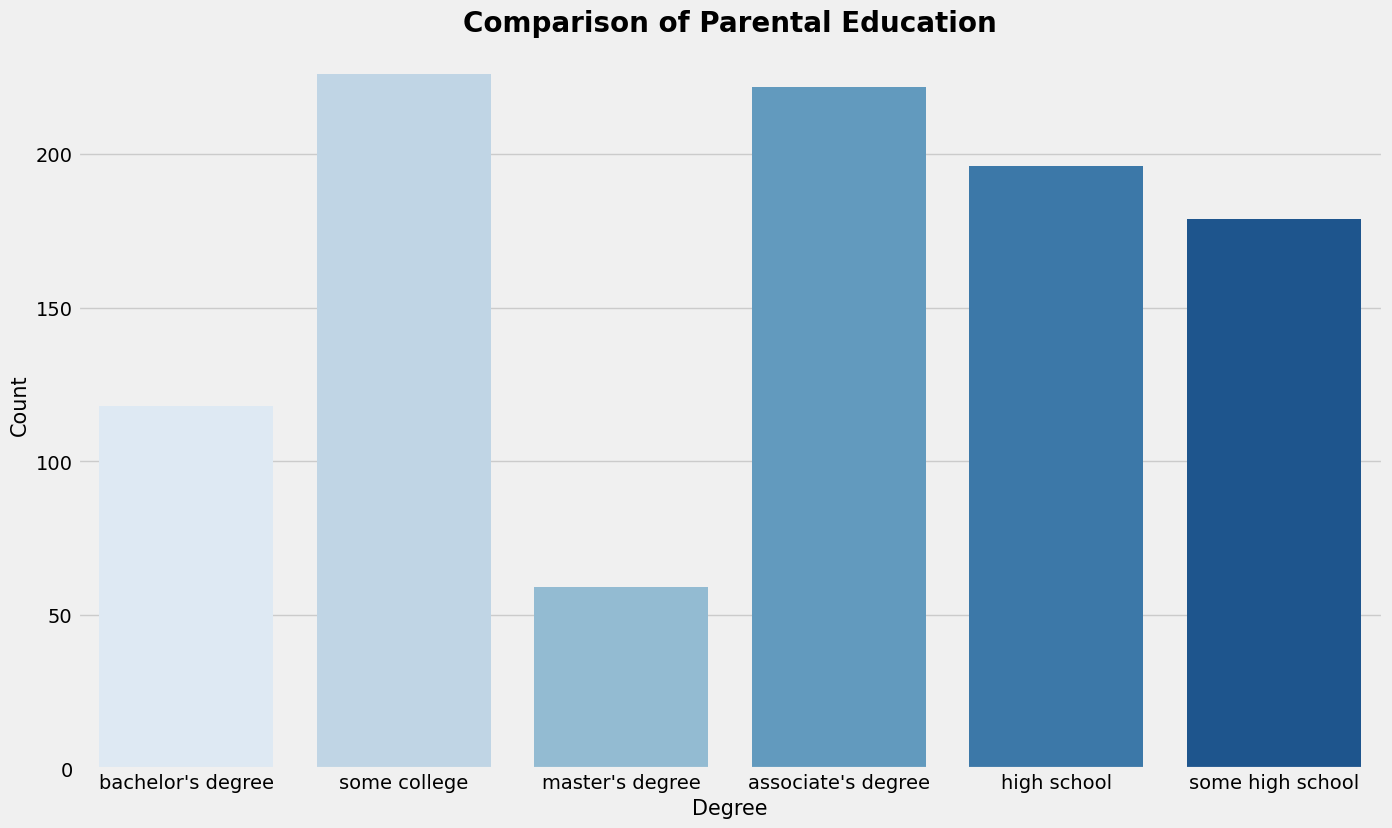

In [79]:
# Setting global figure size and style
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

# Count plot
sns.countplot(data=df, x='parental_level_of_education', palette='Blues')

# Title and axis labels
plt.title('Comparison of Parental Education', fontweight='bold', fontsize=20)
plt.xlabel('Degree', fontsize=15)
plt.ylabel('Count', fontsize=15)

# Display plot
plt.show()

### Insights
* Largest number of parents are from some college.

### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

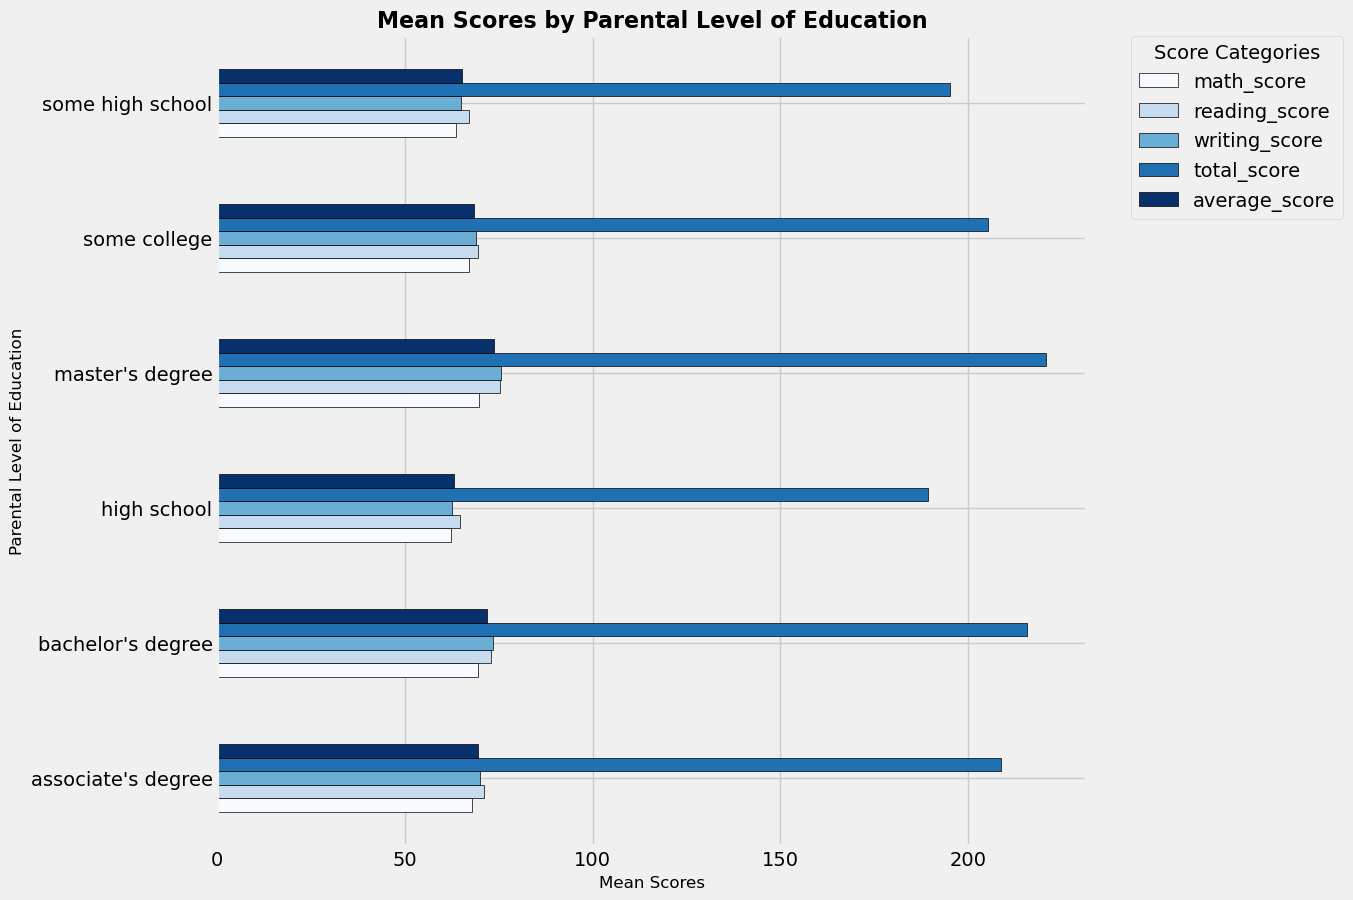

In [83]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number'])

# Group by 'parental_level_of_education' and compute the mean of numeric columns
grouped_data = df.groupby('parental_level_of_education')[numeric_cols.columns].mean()

# Plotting the horizontal bar chart
grouped_data.plot(
    kind='barh', 
    figsize=(10, 10), 
    colormap='Blues', 
    edgecolor='black'
)

# Adding title and labels
plt.title('Mean Scores by Parental Level of Education', fontsize=16, fontweight='bold')
plt.xlabel('Mean Scores', fontsize=12)
plt.ylabel('Parental Level of Education', fontsize=12)

# Adjusting legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Score Categories')

# Show plot
plt.show()

### Insights
* The score of student whose parents possess master and bachelor level education are higher than others.

### 6.4 LUNCH COLUMN
* Which type of lunch is most common amoung students ?
* What is the effect of lunch type on test results?

### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

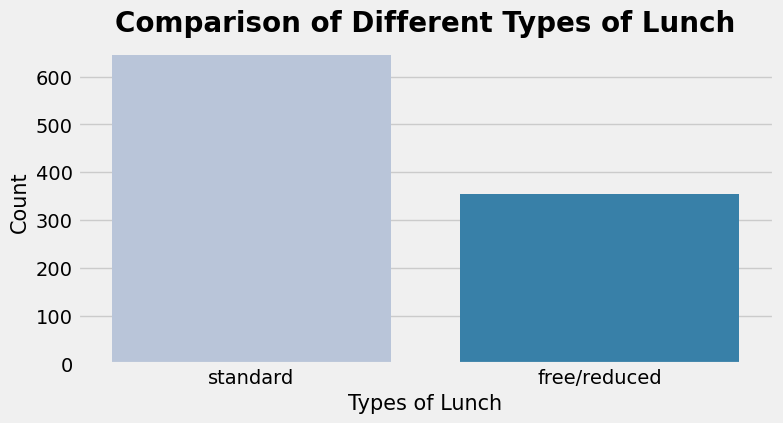

In [98]:
# Set global figure size and style
plt.rcParams['figure.figsize'] = (8, 4)

# Count plot
sns.countplot(data=df, x='lunch', palette='PuBu')

# Add title and axis labels
plt.title('Comparison of Different Types of Lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of Lunch', fontsize=15)
plt.ylabel('Count', fontsize=15)

# Display the plot
plt.show()

### Insights
* Students being served Standard lunch was more than free lunch

### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

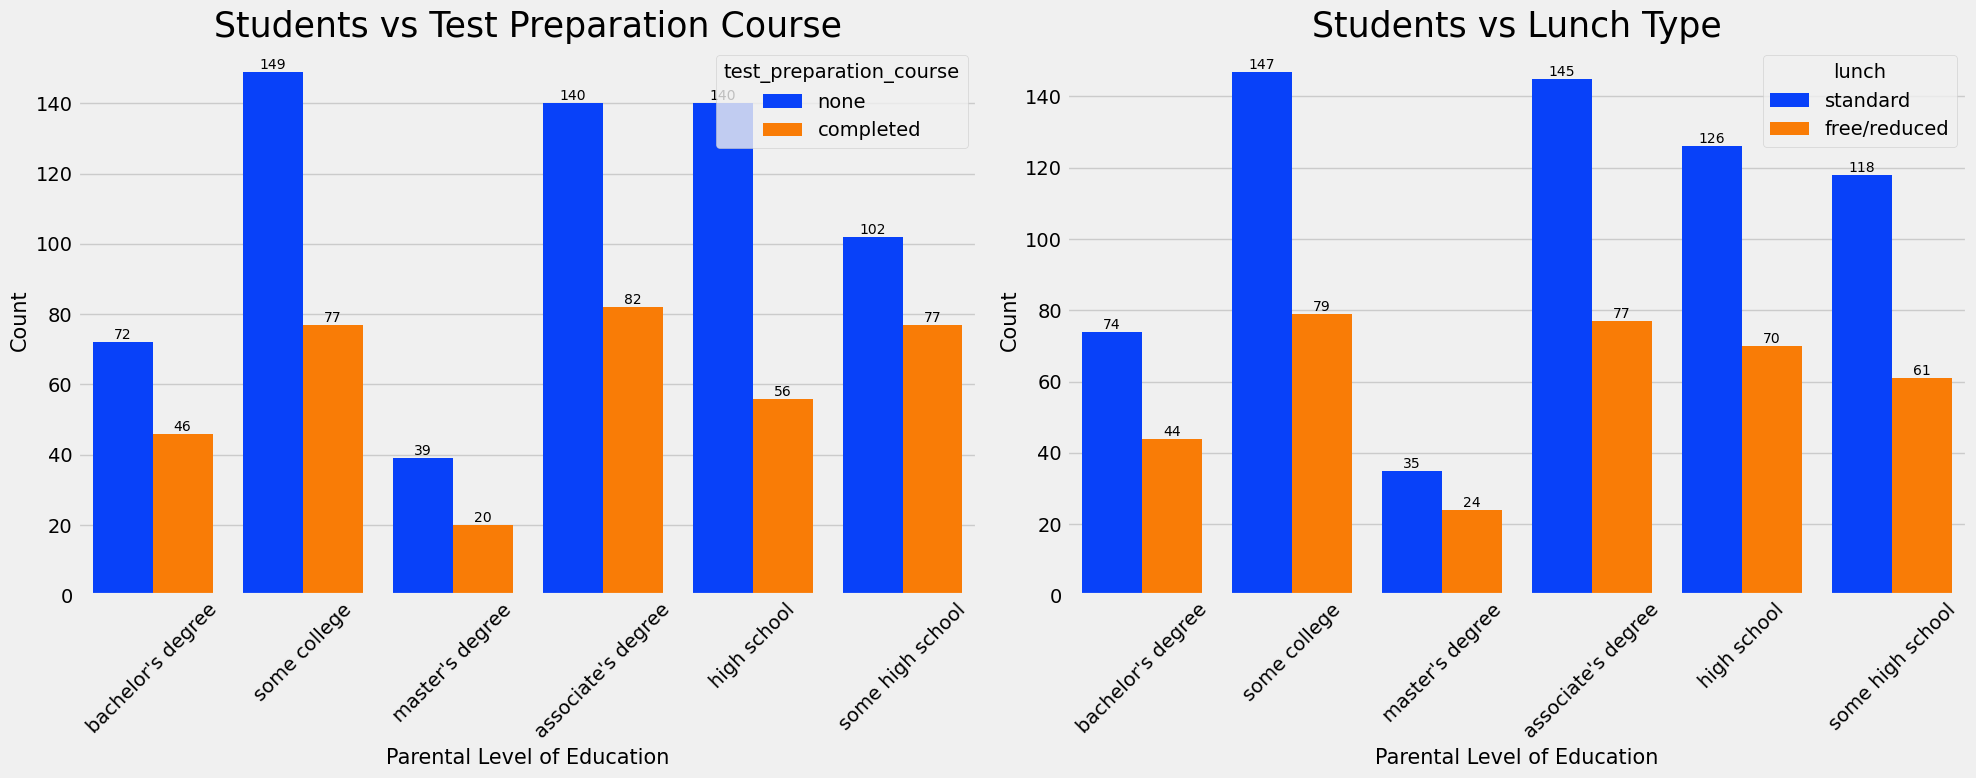

In [89]:

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Parental level of education vs. test preparation course
sns.countplot(
    x='parental_level_of_education', 
    data=df, 
    palette='bright', 
    hue='test_preparation_course', 
    saturation=0.95, 
    ax=ax[0]
)
ax[0].set_title('Students vs Test Preparation Course', color='black', size=25)
ax[0].set_xlabel('Parental Level of Education', fontsize=15)
ax[0].set_ylabel('Count', fontsize=15)
ax[0].tick_params(axis='x', rotation=45)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=10)

# Plot 2: Parental level of education vs. lunch
sns.countplot(
    x='parental_level_of_education', 
    data=df, 
    palette='bright', 
    hue='lunch', 
    saturation=0.95, 
    ax=ax[1]
)
ax[1].set_title('Students vs Lunch Type', color='black', size=25)
ax[1].set_xlabel('Parental Level of Education', fontsize=15)
ax[1].set_ylabel('Count', fontsize=15)
ax[1].tick_params(axis='x', rotation=45)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=10)

# Adjust layout and display
plt.tight_layout()
plt.show()


### Insights
* Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

### 6.5 TEST PREPARATION COURSE COLUMN
* Which type of lunch is most common amoung students ?
* Is Test prepration course has any impact on student's performance ?

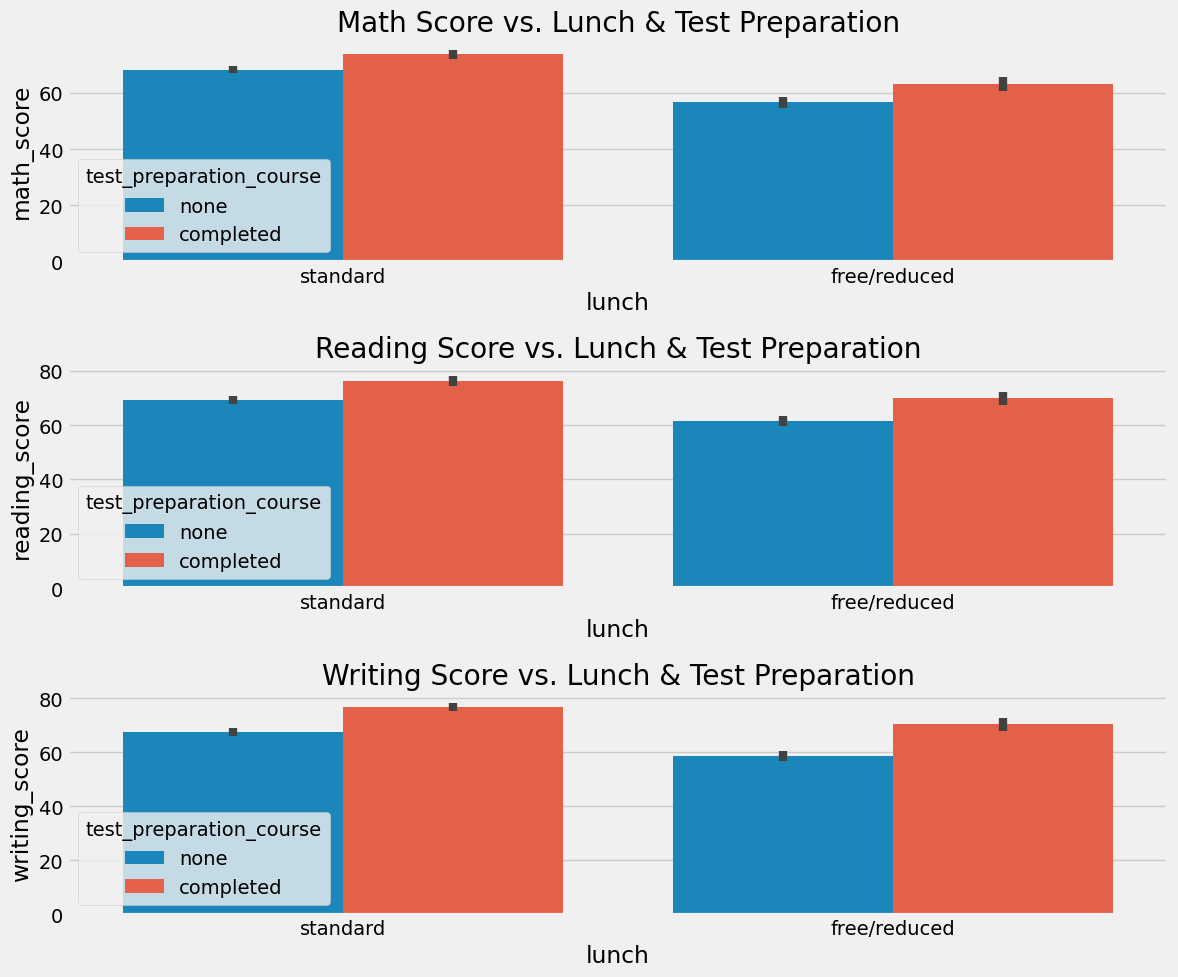

In [100]:

# Set figure size
plt.figure(figsize=(12, 10))

# Subplot 1: Math score vs. Lunch and Test Preparation Course
plt.subplot(3, 1, 1)
sns.barplot(x='lunch', y='math_score', hue='test_preparation_course', data=df)
plt.title('Math Score vs. Lunch & Test Preparation')

# Subplot 2: Reading score vs. Lunch and Test Preparation Course
plt.subplot(3, 1, 2)
sns.barplot(x='lunch', y='reading_score', hue='test_preparation_course', data=df)
plt.title('Reading Score vs. Lunch & Test Preparation')

# Subplot 3: Writing score vs. Lunch and Test Preparation Course
plt.subplot(3, 1, 3)
sns.barplot(x='lunch', y='writing_score', hue='test_preparation_course', data=df)
plt.title('Writing Score vs. Lunch & Test Preparation')

# Optional: Empty fourth subplot (or remove if not needed)
#plt.subplot(3, 1, 4)
#plt.axis('off')  # Hides the 4th subplot

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()


### Insights
* Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

### 6.6 CHECKING OUTLIERS

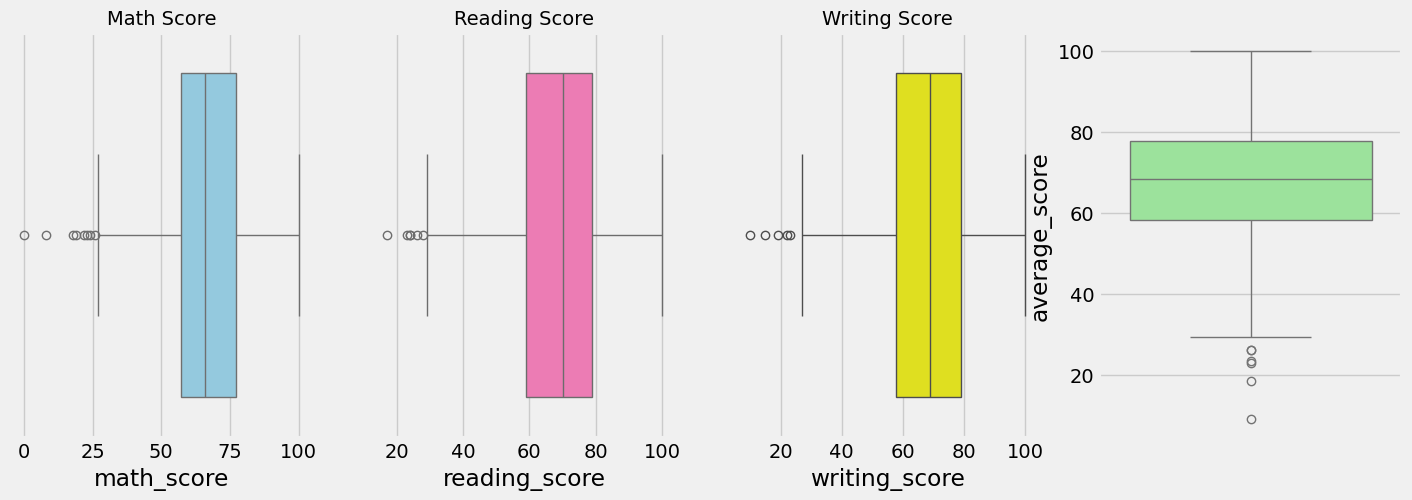

In [102]:
# Create subplots with 1 row and 4 columns
fig, ax = plt.subplots(1, 4, figsize=(16, 5))

# Boxplot for math score
sns.boxplot(x=df['math_score'], color='skyblue', ax=ax[0])
ax[0].set_title('Math Score', fontsize=14)

# Boxplot for reading score
sns.boxplot(x=df['reading_score'], color='hotpink', ax=ax[1])
ax[1].set_title('Reading Score', fontsize=14)

# Boxplot for writing score
sns.boxplot(x=df['writing_score'], color='yellow', ax=ax[2])
ax[2].set_title('Writing Score', fontsize=14)

sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

### 6.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

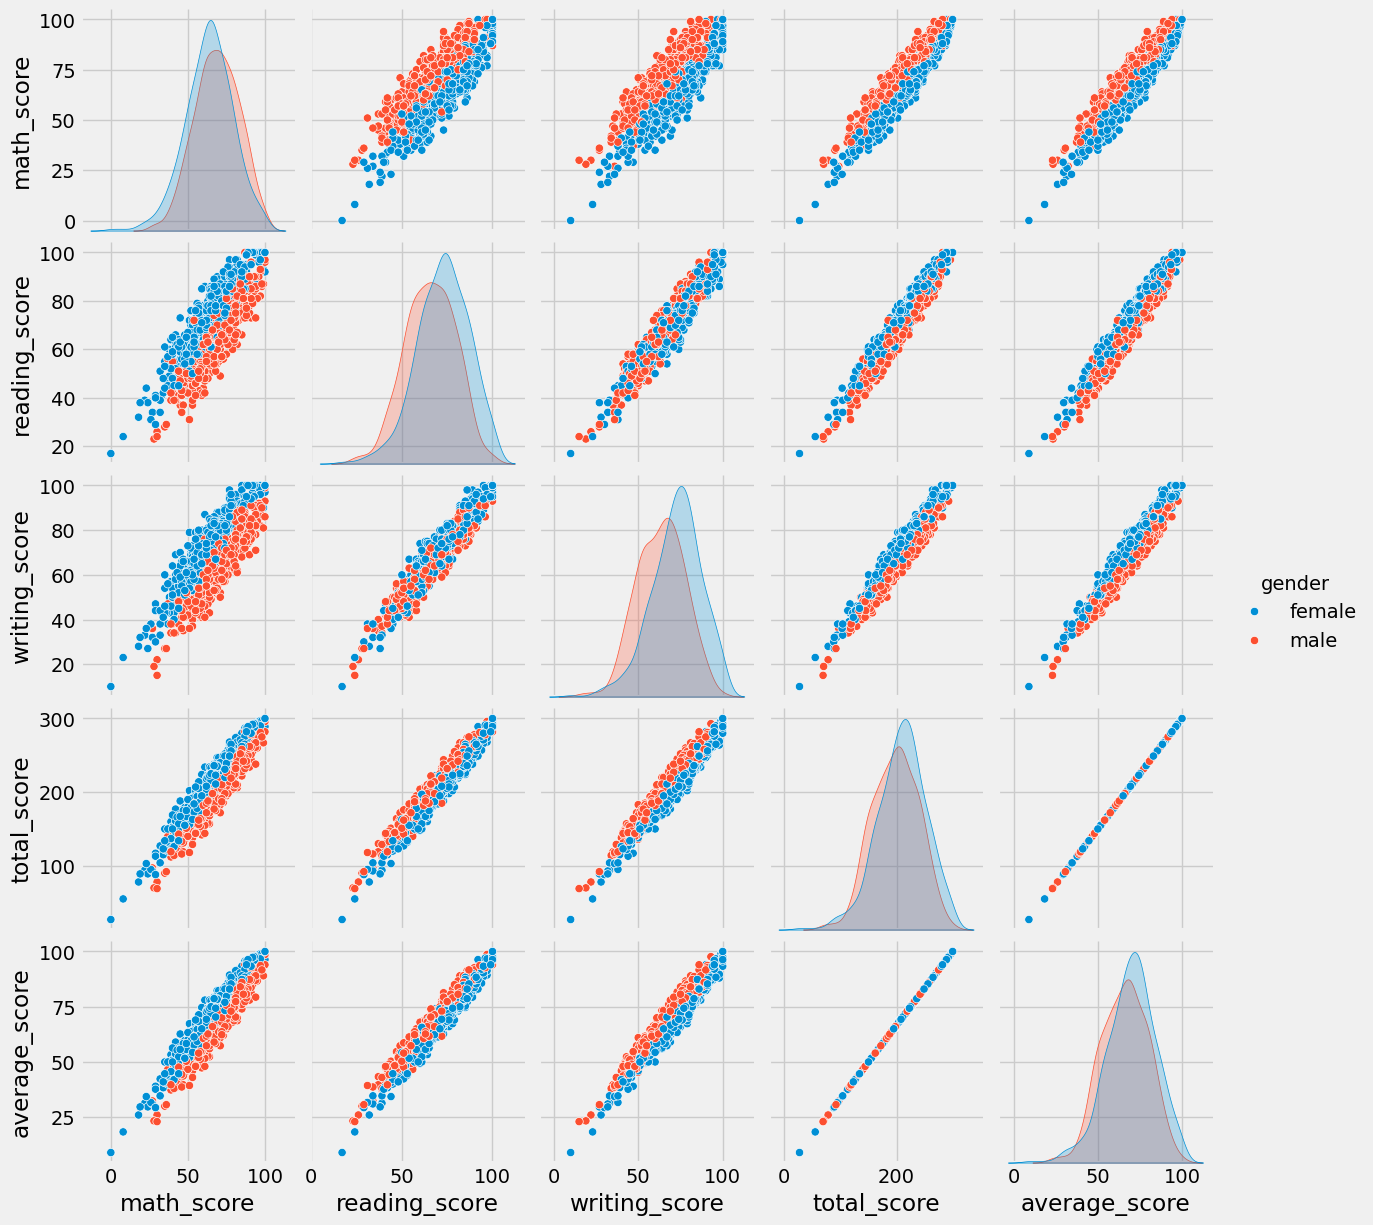

In [103]:
sns.pairplot(df,hue = 'gender')
plt.show()

### Insights
* From the above plot it is clear that all the scores increase linearly with each other.

In [104]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


### 7. Conclusions
* Student's Performance is related with lunch, race, parental level education
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing preparation course is benefitial.